In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['sample', 'mckinsky']


In [2]:
train = pd.read_csv('../input/mckinsky/train_mck.csv')
test = pd.read_csv('../input/mckinsky/test_mck.csv')
sample = pd.read_csv('../input/sample/sample_submission_1.csv')

In [3]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
sample.head()

,id,stroke
0,36306,0
1,61829,0
2,14152,0
3,12997,0
4,40801,0


In [5]:
train.shape


(43400, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [7]:
w = train['stroke'].value_counts()
per_0 = w[0] / (w[0] + w[1])
per_1 = w[1] / (w[0] + w[1])
print('percentage of zero' , per_0)
print('percentage of one' , per_1)

percentage of zero 0.9819585253456221
percentage of one 0.01804147465437788


## Really glad to see that dataset is clean , so we dont need to much . We only need to treat "bmi" and "smoking_status"  and our classification problem is highly imbalanced 

## Lets write some of the important info , Normal BMI (18.5 to 25) , max value of BMI is 97.6 . BMI value seems to be pretty abnormal , lets explre it more . By using this we can build another variable "obsesity" 
## There is some common info , which is true in general or i am taking them as normal assumptions and on the basis of which i am going to do EDA
## This is like going through a bayesian approach 
## Male suffer from more heart disese then women(research basis)
## Avg glucose level () , lets just explore avg glucose level variable , then return back here . by exporiong it i can say that it is in mg/dL . For non diabetics it is below 125 and for diabeties it can go more than 200 . Inour dataset max value of glucose level is 293 , which is acceptable means no anamoly . We can build a new feature of "diabeties" by using this . 


In [8]:
train.bmi.sort_values(ascending = False)

1913     97.6
10322    96.1
4026     92.0
6340     89.1
43087    89.0
25996    88.6
34824    82.7
38233    80.2
30650    80.1
692      78.0
13499    72.2
302      71.9
17795    71.8
40552    71.7
15728    71.5
21265    70.6
22322    70.3
5391     69.8
15332    69.4
8070     68.6
14269    68.5
25769    68.0
39758    67.0
1334     66.8
35920    66.4
31687    66.3
7046     66.3
39352    65.9
12072    65.8
19063    65.7
         ... 
42737     NaN
42816     NaN
42839     NaN
42915     NaN
42937     NaN
42938     NaN
42970     NaN
42997     NaN
43003     NaN
43007     NaN
43015     NaN
43084     NaN
43100     NaN
43109     NaN
43116     NaN
43156     NaN
43174     NaN
43177     NaN
43200     NaN
43205     NaN
43213     NaN
43250     NaN
43252     NaN
43258     NaN
43283     NaN
43317     NaN
43339     NaN
43351     NaN
43371     NaN
43388     NaN
Name: bmi, Length: 43400, dtype: float64

In [9]:
## BMI also takes into account age and gender
col = ['age' , 'gender' , 'bmi']
e = train[col]
er = e.sort_values(by = 'bmi' , ascending = False)

In [10]:
w = er[er['bmi'] > 30]
len(w)

15782

## BMI has an anamoly behaviour , since there are 15782 / 43400  entries have BMI greator than 30 , which simply means one third of the patients are obsese . Heart disease and obsesity are related .But i am still confused about thew BMI because to have the BMI of a 90+ you got to have weight of 650 pounds (294 kg) even for 60 BMI you got to have  about 200 kg These numbers looks like insane .

In [11]:
w.head(100)

,age,gender,bmi
1913,17.0,Male,97.6
10322,6.0,Male,96.1
4026,38.0,Male,92.0
6340,18.0,Male,89.1
43087,78.0,Male,89.0
25996,32.0,Female,88.6
34824,47.0,Female,82.7
38233,38.0,Female,80.2
30650,34.0,Female,80.1
692,23.0,Female,78.0


In [12]:
col1 = ['age' , 'smoking_status']
q = train[col1]
y = q.sort_values(by = 'age')
## lets see all kids having age smaller than 5 
y_5 = y[y['age'] < 5]
y_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2362 entries, 1389 to 36656
Data columns (total 2 columns):
age               2362 non-null float64
smoking_status    0 non-null object
dtypes: float64(1), object(1)
memory usage: 55.4+ KB


In [13]:
## lets see till 10 years of age 
y_10 = y[y['age'] < 10]
y_10.info()
## results are same 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4285 entries, 1389 to 30766
Data columns (total 2 columns):
age               4285 non-null float64
smoking_status    0 non-null object
dtypes: float64(1), object(1)
memory usage: 100.4+ KB


In [14]:
## lets check for 15 year teens 
y_15 = y[y['age'] < 15]
y_15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6188 entries, 1389 to 32382
Data columns (total 2 columns):
age               6188 non-null float64
smoking_status    689 non-null object
dtypes: float64(1), object(1)
memory usage: 145.0+ KB


In [15]:
y_15.smoking_status.value_counts()

never smoked       572
formerly smoked    102
smokes              15
Name: smoking_status, dtype: int64

In [16]:
## lets take an extra step to check for kids smaller than 12 
y_12 = y[y['age'] < 12]
y_12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4928 entries, 1389 to 29782
Data columns (total 2 columns):
age               4928 non-null float64
smoking_status    192 non-null object
dtypes: float64(1), object(1)
memory usage: 115.5+ KB


In [17]:
y_12.smoking_status.value_counts()

never smoked       157
formerly smoked     33
smokes               2
Name: smoking_status, dtype: int64

In [18]:
import numpy as np

In [19]:
y_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4285 entries, 1389 to 30766
Data columns (total 2 columns):
age               4285 non-null float64
smoking_status    0 non-null object
dtypes: float64(1), object(1)
memory usage: 100.4+ KB


In [20]:
train['bmi'].value_counts()

27.7    271
27.6    267
26.8    266
26.1    265
27.1    260
26.9    254
27.5    254
27.3    252
24.8    249
26.2    249
29.6    247
25.5    245
25.3    244
27.0    243
25.7    242
28.6    241
28.8    240
26.5    240
24.9    239
28.1    239
28.3    239
26.0    238
23.0    236
30.6    236
25.1    235
28.4    235
26.7    234
29.4    234
28.0    234
25.2    234
       ... 
11.1      1
68.6      1
57.8      1
78.0      1
72.2      1
63.2      1
65.9      1
64.4      1
12.6      1
63.8      1
65.8      1
56.1      1
69.8      1
68.0      1
92.0      1
65.3      1
60.0      1
71.8      1
64.7      1
53.1      1
11.9      1
62.3      1
61.0      1
71.9      1
63.6      1
10.1      1
67.0      1
11.2      1
97.6      1
65.2      1
Name: bmi, Length: 555, dtype: int64

In [21]:
## lets build the features 
train['obsese'] = [1 if i > 30 else 0 for i in train.bmi]

In [22]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,obsese
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,1
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,1
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0,0


In [23]:
train.Residence_type.value_counts()

Urban    21756
Rural    21644
Name: Residence_type, dtype: int64

In [24]:
#train['residence_type'] = [1 if i == 'Urban' else 0 for i in train.Residence_type] 

In [25]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,obsese
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,1
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,1
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0,0


In [26]:
#train.drop(['residence_type'] , axis  = 1 , inplace = True)

In [27]:
## so now i got to make some important , although this is the naive way to do , but right now i donmt have any other choice 
## so we will go by the dirty way 
y_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4285 entries, 1389 to 30766
Data columns (total 2 columns):
age               4285 non-null float64
smoking_status    0 non-null object
dtypes: float64(1), object(1)
memory usage: 100.4+ KB


In [28]:
train['smoking_status'].value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [29]:
train_fil = train.query('age<10')
train_fil.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,obsese
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0,0
33,33759,Female,3.0,0,0,No,children,Urban,73.74,16.0,NaN,0,0
42,11014,Male,4.0,0,0,No,children,Rural,79.17,20.0,NaN,0,0
79,65535,Male,8.0,0,0,No,children,Rural,78.05,25.7,NaN,0,0


In [30]:
train_fil.smoking_status.value_counts()

Series([], Name: smoking_status, dtype: int64)

In [31]:
train_fil.fillna('never smoked', inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [32]:
train_fil.smoking_status.value_counts()

never smoked    4285
Name: smoking_status, dtype: int64

In [33]:
train_fil1 = train.query('age>=10')
train_fil1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,obsese
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,1
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,1
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0,1
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0,0


In [34]:
mer = [train_fil , train_fil1]
train1 = pd.concat(mer)
train1.shape

(43400, 13)

In [35]:
## prev smoking status = 30108
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43400 entries, 0 to 43399
Data columns (total 13 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  42010 non-null object
smoking_status       34393 non-null object
stroke               43400 non-null int64
obsese               43400 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 4.6+ MB


In [36]:
train['smoking_status'].value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [37]:
#train1.smoking_status.fillna(-999 , inplace = True)

In [38]:
train1.smoking_status.value_counts()

never smoked       20338
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [39]:
train1.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,obsese
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18,never smoked,0,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0,0
33,33759,Female,3.0,0,0,No,children,Urban,73.74,16,never smoked,0,0
42,11014,Male,4.0,0,0,No,children,Rural,79.17,20,never smoked,0,0
79,65535,Male,8.0,0,0,No,children,Rural,78.05,25.7,never smoked,0,0


## lets just do some experiment for age column we will make the age_40 , age_50 and age_60 and see how does they affect the model prediction . after applying them in various combinationas . 

In [40]:
train1['age_40'] = [1 if i > 40 else 0 for i in train.age]
train1['age_50'] = [1 if i > 50 else 0 for i in train.age]
train1['age_60'] = [1 if i > 60 else 0 for i in train.age]
## since 'avg_glucose_level' is indication of diabeties , so we will create a new col diabeties 
train1['diabeties'] = [1 if i > 200 else 0 for i in train1.avg_glucose_level]

In [41]:
train1.shape

(43400, 17)

In [42]:
## lets drop the col  'gender' , 'Residence_type' ,  
col_drop = ['avg_glucose_level' , 'age' , 'bmi']
train1.drop(col_drop , axis  =1 , inplace = True)

In [43]:
train1.shape

(43400, 14)

In [44]:
train1.work_type.value_counts()

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64

In [45]:
w = train1.columns
w

Index(['id', 'gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status', 'stroke', 'obsese',
       'age_40', 'age_50', 'age_60', 'diabeties'],
      dtype='object')

In [46]:
## here we will try out various combinations of age_40 , age_50 and age_60 
cat_col = ['hypertension', 'heart_disease', 'work_type', 'smoking_status',
           'obsese', 'Residence_type', 'gender', 'ever_married', 'age_40' , 'age_50' 
           , 'age_60','diabeties']
df = pd.get_dummies(train1 , columns = cat_col)  

In [47]:
df.columns

Index(['id', 'stroke', 'hypertension_0', 'hypertension_1', 'heart_disease_0',
       'heart_disease_1', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'obsese_0', 'obsese_1', 'Residence_type_Rural',
       'Residence_type_Urban', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'age_40_0', 'age_40_1',
       'age_50_0', 'age_50_1', 'age_60_0', 'age_60_1', 'diabeties_0',
       'diabeties_1'],
      dtype='object')

## as expected not very much corelation 

In [48]:
## Ok now lets build a neural network that will be our baseline model 
## Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
%matplotlib inline
sns.set_style("whitegrid")
np.random.seed(697)

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [49]:
train_df, test_df = train_test_split(df, test_size = 0.25, random_state= 1984)

In [50]:
train_df.shape

(32550, 31)

In [51]:
train_df.shape[0]

32550

In [52]:
test_df.shape

(10850, 31)

In [53]:
print(train_df.stroke.sum() / train_df.shape[0])
print(test_df.stroke.sum() / test_df.shape[0])

0.01815668202764977
0.017695852534562212


In [54]:
#Get the data ready for the Neural Network
train_y = train_df.stroke
test_y = test_df.stroke

train_x = train_df.drop(['stroke'], axis = 1)
test_x = test_df.drop(['stroke'], axis = 1)
## necessary for necessary neural network to convert to numpy array  not for Xgboost  , so we will keep them as it is for 
## Xgboost
#train_x =np.array(train_x)
#test_x = np.array(test_x)

#train_y = np.array(train_y)
#test_y = np.array(test_y)

# Stop make the necessary changes to run the nural network or jump to the Xgboost model


In [ ]:
print('Building Neural Network model...')
adam = optimizers.adam(lr = 0.005, decay = 0.0000001)

model = Sequential()
model.add(Dense(48, input_dim=train_x.shape[1],
                kernel_initializer='normal',
                #kernel_regularizer=regularizers.l2(0.02),
                activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(24,
                #kernel_regularizer=regularizers.l2(0.02),
                activation="tanh"))
model.add(Dropout(0.3))
model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss="binary_crossentropy", optimizer='adam')

history = model.fit(train_x, train_y, validation_split=0.2, epochs=20, batch_size=32)

In [ ]:
#Predict on test set
predictions_NN_prob = model.predict(test_x)
predictions_NN_prob = predictions_NN_prob[:,0]

predictions_NN_01 = np.where(predictions_NN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output

In [ ]:
#Print accuracy
acc_NN = accuracy_score(test_y, predictions_NN_01)
print('Overall accuracy of Neural Network model:', acc_NN)

In [ ]:
#Print Area Under Curve
false_positive_rate, recall, thresholds = roc_curve(test_y, predictions_NN_prob)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

In [ ]:
#Print Confusion Matrix
cm = confusion_matrix(test_y, predictions_NN_01)
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [ ]:
test.shape

In [ ]:
test.head()

In [ ]:
test.info()

In [ ]:
test1 = test.query('age<10')             ## same goes here , we will give all childrens with age<10 never smoked
test1.smoking_status.value_counts()

In [ ]:
test1.smoking_status.fillna('never smoked' , inplace = True)

In [ ]:
test1.smoking_status.value_counts()

In [ ]:
test2 = test.query('age>=10')
test2.head()

In [ ]:
frame = [test1 , test2]
test_1 = pd.concat(frame)
test_1.shape

In [ ]:
test_1.smoking_status.fillna(-999 , inplace = True)

In [ ]:
test_1.smoking_status.value_counts()

In [ ]:
## transforming the features
test_1['diabeties'] = [1 if i > 200 else 0 for i in test_1.avg_glucose_level]
test_1['obsese'] = [1 if i > 30 else 0 for i in test_1.bmi]
test_1['age_40'] = [1 if i > 40 else 0 for i in test_1.age]

In [ ]:
test_1.columns

In [ ]:
col2 = ['avg_glucose_level', 'bmi', 'age']
test_1.drop(col2 , axis = 1 , inplace = True)

In [ ]:
test_1.shape

In [ ]:
cat_col = ['hypertension', 'heart_disease', 'work_type', 'smoking_status',
           'obsese', 'Residence_type', 'gender', 'ever_married', 'age_40','diabeties']
dft = pd.get_dummies(test_1 , columns = cat_col)
dft.shape

In [ ]:
#Get the data ready for the Neural Network
## just convert the dft to numpy array 
dft1 = np.array(dft)

In [ ]:
#Predict on test set
predictions_NN_prob = model.predict(dft1)                       ##  model.predict(test_x)
predictions_NN_prob = predictions_NN_prob[:,0]

predictions_NN_01 = np.where(predictions_NN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output

In [ ]:
pred = pd.Series(predictions_NN_01)
len(pred)

In [ ]:
len(test_1.id)

In [ ]:
my_submission = pd.DataFrame({'id': test_1.id, 'strok': pred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

## Lets implement a simple Xgboost model , we will build xgboost model andf let the model handle the missing values and find its way to optimization 
###  The feature where you fill the values with the -999 , leave them as Nan 

In [55]:
import pandas as pd
import numpy as np
import sys
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report, average_precision_score
import xgboost as xgb
from xgboost import plot_importance, to_graphviz
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import graphviz

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

%matplotlib inline

mckinsky
sample



In [56]:
## function to plot roc 
def plot_roc(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (area = %0.6f)' % roc_auc)
    plt.legend(loc="lower right")
    plt.show()


In [57]:
## function to plot precision recall
def plot_pr(recall,precision,average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall: {0:0.6f}'.format(average_precision))
    plt.show()

In [58]:
## function to plotLeraning curve
def plot_learning_curve(results,epochs):
    x_axis = range(0, epochs)
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['logloss'], label='logloss-Train')
    ax.plot(x_axis, results['validation_1']['logloss'], label='logloss-Test')
    ax.plot(x_axis, results['validation_0']['auc'], label='auc-Train')
    ax.plot(x_axis, results['validation_1']['auc'], label='auc-Test')
    ax.legend()
    plt.ylabel('Log Loss/AUC')
    plt.title('XGBoost Log Loss and AUC evolution')
    plt.show()

In [59]:

def run_xgboost_and_calculate_auc(data,
                                  target='target',
                                  drop='variable_to_find_and_exclude',
                                  w=1,
                                  plot_learning=False,
                                  plot_variables=False,
                                  plot_ROC_PR=False,
                                  plot_confusion=False,
                                  plot_graph_tree=False,
                                  learning_rate=0.05,
                                  max_depth=10,
                                  esr=10,
                                  CV=True,
                                  title='',
                                  plot_all=False,
                                  ensembler=False,
                                  test_size=.2):
    '''
    Generic function to run xgboost to test the added changes and plot roc, learning and others and save the model.
    '''
    # features
    X = df.drop(target, axis=1)
   #X = pd.get_dummies(X)
    
    # targets
    Y = df[target]

    #X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
     #     (train_x, train_y, test_x , test_y) for my model              test_size=test_size,
      #                                                  random_state=12345,
       #                                                 stratify=Y)
   
     
    print(f'variables: {len(list(X))}, rows:{len(X)}, flags:{sum(list(df[target]))}')
    
        
    clf = xgb.XGBClassifier(
        learning_rate=learning_rate,
        n_estimators=1000,
        max_depth=4,
        min_child_weight=4,
        gamma=0.6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=5e-05,
        objective='binary:logistic',
        nthread=20,
        scale_pos_weight=w,
        seed=27)

    eval_set = [(train_x , train_y), (test_x , test_y)]

    if plot_all:
        plot_learning=True
        plot_variables=True
        plot_ROC_PR=True
        plot_confusion=True
        plot_graph_tree=True
        
    if CV:
        X = pd.concat([train_x,test_x])
        y = pd.concat([train_y,test_y])
        xgb_param = clf.get_xgb_params()
        xgtrain = xgb.DMatrix(X.values, y.values)
        cvresult = xgb.cv(xgb_param,
                          xgtrain,
                          num_boost_round=clf.get_params()['n_estimators'],
                          nfold=5,
                          metrics='auc',
                          early_stopping_rounds=esr)
        print(cvresult.tail(1))
        clf.set_params(n_estimators=cvresult.shape[0])

    clf.fit(train_x,
            train_y,
            early_stopping_rounds=25,
            eval_metric=['auc','error','logloss'],
            eval_set=eval_set,
            verbose=False)

    Y_pred = clf.predict_proba(test_x)
    y_true = np.array(test_y)
    y_scores = Y_pred[:, 1]

    fpr, tpr, _ = roc_curve(test_y, y_scores)
    roc_auc = auc(fpr, tpr)
    average_precision = average_precision_score(test_y, y_scores)
    precision, recall, _ = precision_recall_curve(test_y, y_scores)
    
    if plot_ROC_PR:
        plot_roc(fpr, tpr, roc_auc)
        plot_pr(recall,precision,average_precision)
    else:
        print('Area under ROC: %0.6f' % roc_auc)

    if plot_graph_tree:
        xgb.plot_tree(clf, rankdir='LR')
        fig = plt.gcf()
        fig.set_size_inches(150, 100)

    if plot_learning:
        results = clf.evals_result()
        epochs = len(results['validation_0']['error'])

    if plot_variables:
        xgb.plot_importance(clf,max_num_features=20,importance_type='gain',xlabel='gain')

    if plot_confusion:
        print('\n', classification_report(y_true, y_scores.round()))


        
    if ensembler:
        return test_y, y_scores

    print('-------------END EXECUTION-------------')

variables: 30, rows:43400, flags:783
    test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
38       0.763524      0.022435        0.772502       0.011628


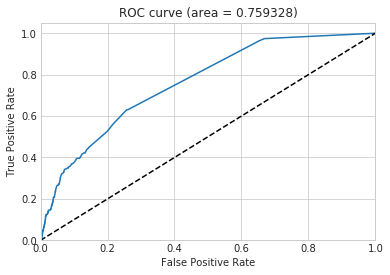

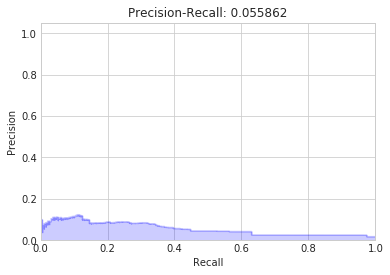

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



              precision    recall  f1-score   support

          0       0.98      1.00      0.99     10658
          1       0.00      0.00      0.00       192

avg / total       0.96      0.98      0.97     10850



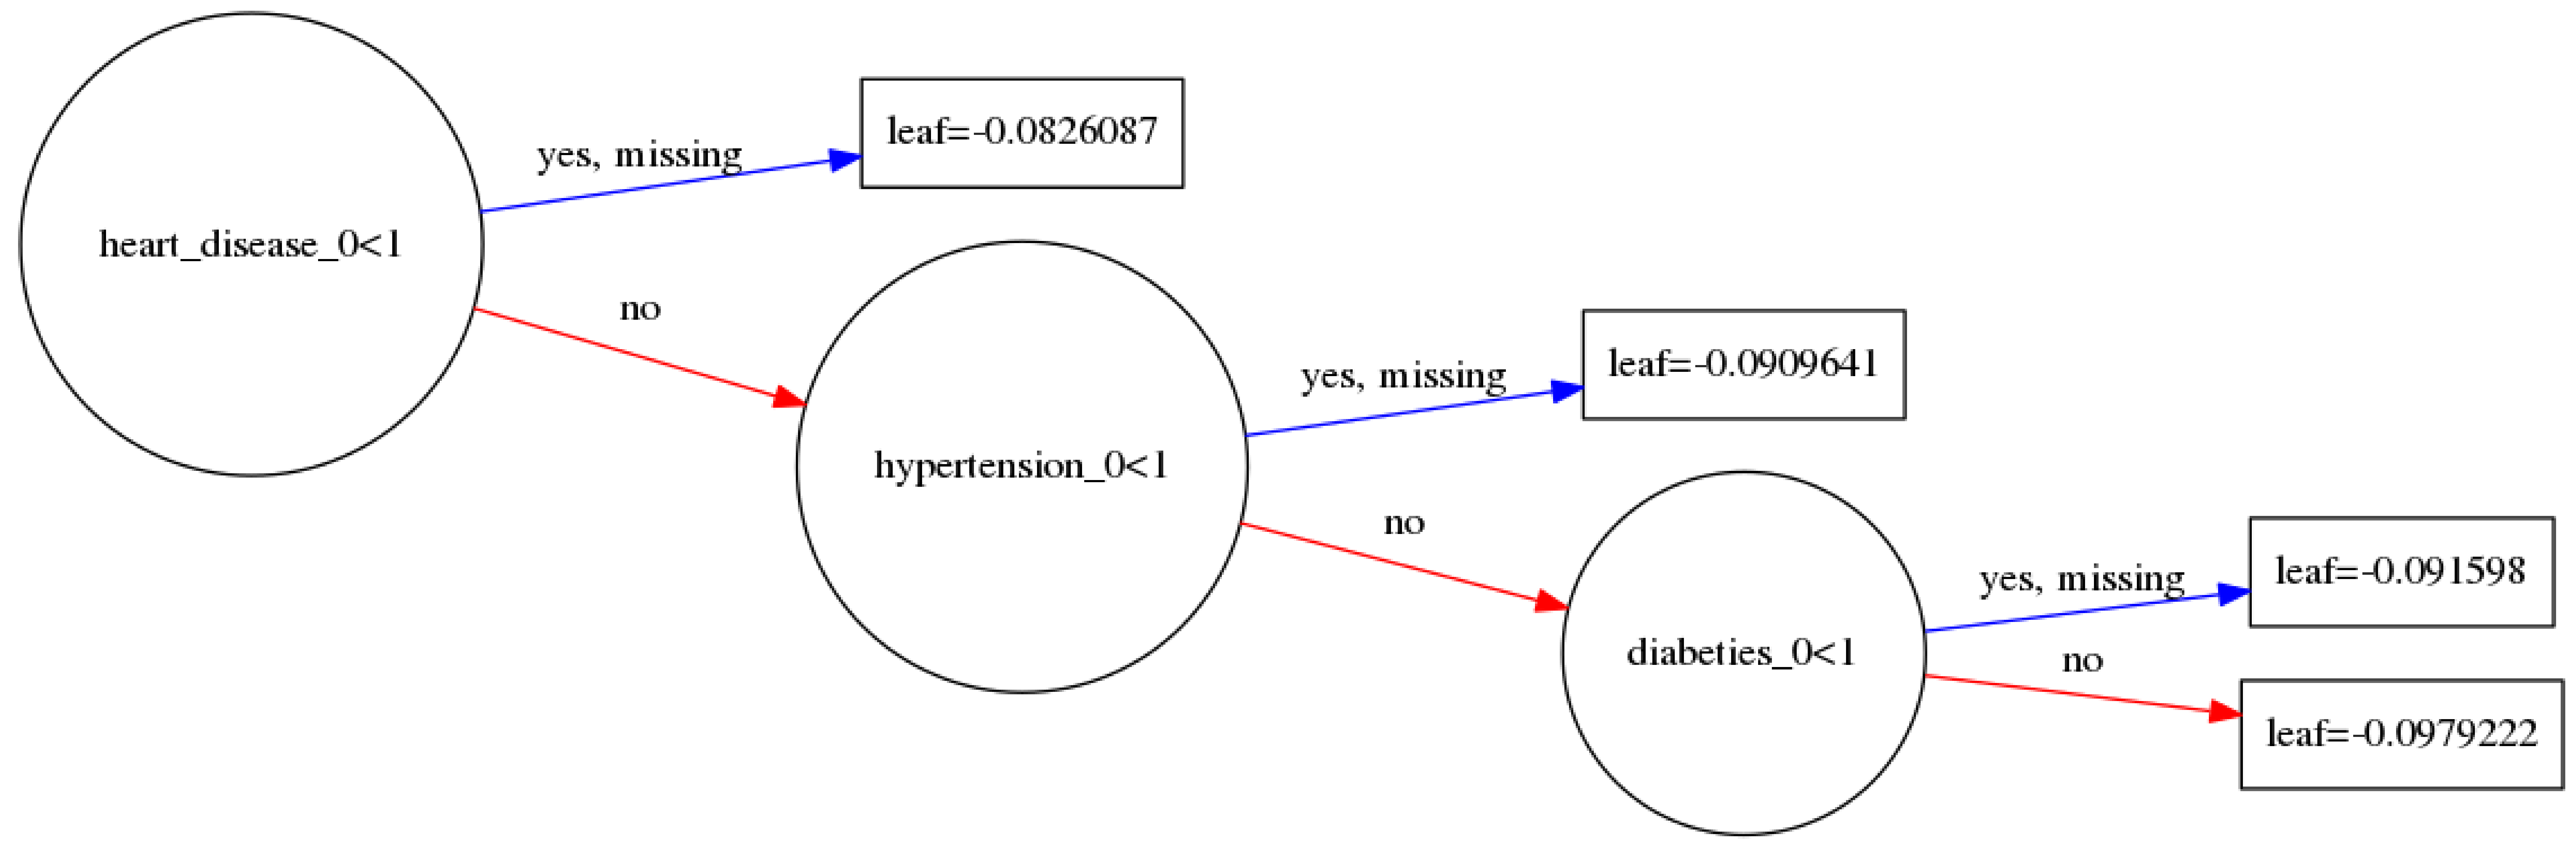

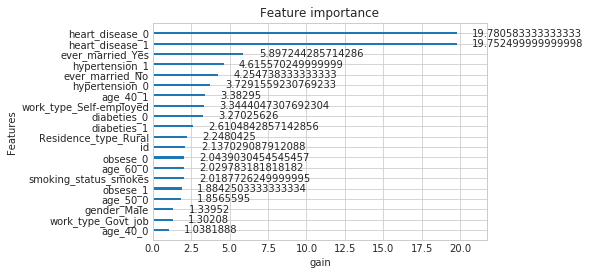

In [60]:
Y_test, y_scores = run_xgboost_and_calculate_auc(df,target='stroke',plot_all=True,ensembler=True)

## With a fairly simple Xgboost model we got a good auc score of 0.7728
## Now lets do some Hyperparameter tuning and try to improve the score , baseline score will be 0.7728 with default parameters 
## There is one thing you need to observe , you got a good score for the Xgboost way better than Neural netwrk , but there is a twist here auc score is 0.7728 but precision recall is way tool less 0.05 
## learning resources for hyperparameter tuning 
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

## We will do the parameter tuning in Xgboost model but before that we will try some other tweaks like dropping some variables , because i used all the variables which i had . 

## After that we will try some hyperparameter tuning , but before hyperparameter tuning lets just implement the gradient boosting algo on this dataset . 




## This time i am going to drop some variables , by just intuition . Because it looks like a fairely straightforward data , but after that i will try PCA and t-sne 

In [ ]:
## lets see the columns 
df.columns

## heart_diseses_0 and heart_disese_1 looks like the most important feature according to our given model . I am going to drop the last three features and lets see whts the effect on the result . 

In [ ]:
col5 = ['smoking_status_smokes' , 'Residence_type_Rural' , 'age_40_0']
df_1 = df.drop(col5 , axis = 1)
df_1.columns

## You need to first make your Xgboost as the complete function , right now there are few modifications needed to be done . We will do them after a while , First lets just buid a Gradient boosting model 

## I understand there is a glitch here , since we have saw that id is the one of the important feature , but we know that it is not . So we will index it 

In [61]:
train_id = train.set_index('id')

In [62]:
train_id.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,obsese
id,,,,,,,,,,,,
30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0,0
30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,1
16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0,0
56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,1
46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0,0


##  So lets just make id as the index and then run the model in both xgboost and gradient boost , intuition just says that id is not gonna help my model and if it is becoming so important then you need to get rid of it by making it index 

In [63]:
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [64]:
# First prepare the data for the gb 
df_id = df.drop(['id'] , axis = 1)
df_id.head()

,stroke,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,...,ever_married_No,ever_married_Yes,age_40_0,age_40_1,age_50_0,age_50_1,age_60_0,age_60_1,diabeties_0,diabeties_1
0,0,1,0,1,0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
2,0,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,1,1,0,1,0
33,0,1,0,1,0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
42,0,1,0,1,0,0,0,0,0,1,...,1,0,0,1,0,1,0,1,1,0
79,0,1,0,1,0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0


In [65]:
tr_x , te_x = train_test_split(df_id , test_size = 0.25 , random_state = 23)

In [66]:
te_x.head()

,stroke,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,...,ever_married_No,ever_married_Yes,age_40_0,age_40_1,age_50_0,age_50_1,age_60_0,age_60_1,diabeties_0,diabeties_1
14707,0,1,0,1,0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
955,0,1,0,1,0,1,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
32598,0,1,0,1,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
37012,0,1,0,1,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
21641,0,1,0,1,0,0,0,1,0,0,...,0,1,0,1,0,1,1,0,1,0


In [67]:
## data processing for model 
tr_y = tr_x['stroke']
te_y = te_x['stroke']


In [68]:
tr_x.drop(['stroke'] , axis = 1 , inplace = True)
te_x.drop(['stroke'] , axis = 1 , inplace = True)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [69]:
tr_x.head()

,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,...,ever_married_No,ever_married_Yes,age_40_0,age_40_1,age_50_0,age_50_1,age_60_0,age_60_1,diabeties_0,diabeties_1
965,1,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,1,1,0,1,0
28305,1,0,1,0,0,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
18274,1,0,1,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
7242,1,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
43278,1,0,1,0,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [70]:
te_x.head()

,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,...,ever_married_No,ever_married_Yes,age_40_0,age_40_1,age_50_0,age_50_1,age_60_0,age_60_1,diabeties_0,diabeties_1
14707,1,0,1,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
955,1,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
32598,1,0,1,0,0,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
37012,1,0,1,0,0,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
21641,1,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,1,1,0,1,0


In [71]:
tr_x = np.array(tr_x)
te_x = np.array(te_x)
type(te_x)

numpy.ndarray

In [72]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(tr_x , tr_y)
predictions = gb.predict(te_x)

print("Confusion Matrix:")
print(confusion_matrix(te_y , predictions))
print()
print("Classification Report")
print(classification_report(te_y , predictions))

Confusion Matrix:
[[10663     0]
 [  187     0]]

Classification Report
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     10663
          1       0.00      0.00      0.00       187

avg / total       0.97      0.98      0.97     10850



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [73]:
y_scores_gb = gb.decision_function(te_x)
fpr_gb, tpr_gb, _ = roc_curve(te_y , y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

Area under ROC curve = 0.79


## so the baeline AUC score for gradient boosting is 0.78 , what i see at this point of time is the model is actually predicting each and every sample as zero . There could be the case that i am actually overfitting Results are same for the Xgboost also . lets drop some features and buuild the boosting model again 
## update adding the age_50 and age_60 fetaures got us 0.01 gain and our public sore becomes 0.79 


In [ ]:
df.columns

## Lets just drop the smoking_status and work_type , before this lets wirte a function for the Gradboost 


In [ ]:
def Gradboost(data , col_drop , target):
    t = data.drop(col_drop , axis = 1)
    
    train_x , test_x = train_test_split(t , test_size = 0.25 , random_state = 23)
    train_y = train_x[target] 
    test_y = test_x[target]
    
    train_x.drop([target] , axis = 1 , inplace = True)
    test_x.drop([target] , axis = 1 , inplace = True)
    
    train_x = np.array(train_x)
    test_x = np.array(test_x)
    
    gb = GradientBoostingClassifier(n_estimators =60, learning_rate= 0.01, max_features = 2, max_depth = 12, random_state=0)
    gb.fit(train_x , train_y)
    predictions = gb.predict(test_x)

    print("Confusion Matrix:") 
    print(confusion_matrix(test_y , predictions))
    print()
    print("Classification Report")
    print(classification_report(test_y , predictions))
    
    
    print()
    y_scores_gb = gb.decision_function(test_x)
    fpr_gb, tpr_gb, _ = roc_curve(test_y , y_scores_gb)
    roc_auc_gb = auc(fpr_gb, tpr_gb)

    print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

In [ ]:
## lets just give the variables
data = df
col_drop = ['id'] #'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       # 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']
target = 'stroke'

Gradboost(data , col_drop , target)

## Even after dropping some values , the result still stays the same , now lets try some hyperparameter tuning    
n_estimators =40, learning_rate= 0.5, max_features = 2, max_depth = 8 auc = 0.68  (decreases)
##  n_estimators =40, learning_rate= 0.5, max_features = 2, max_depth = 8 auc = 0.78
## n_estimators =60 learning_rate= 0.5, max_features = 2, max_depth = 8 auc = 0.77
## n_estimators =60 learning_rate= 0.5, max_features = 2, max_depth = 5auc = 0.75
## n_estimators =60 learning_rate= 0.1, max_features = 2, max_depth =12auc = 0.69

## These was the hyperparameter tuning via hit and trial but we didn't findanything better than the original score which is 0.78, in which it actually makes all the samples as zero 
# update 
## after adding age_50 and age_60 , it actually worsens the state roc = .61 for  n_estimators =40, learning_rate= 0.5, max_features = 2, max_depth = 8 
## check for n_estimators =60 learning_rate= 0.5, max_features = 2, max_depth = 8 auc = .60
## n_estimators =60 learning_rate= 0.1, max_features = 2, max_depth =12 , auc = 0.58


# Update the best AUC score is 0.79 , via Gradboost having parameters n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2  
